## Preprocessing the data

To begin the preprocessing ,we use the latest three years exchange rate data to build our data object.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  
from math import sqrt  
JPY_temp=pd.read_csv('E:\\JPY.csv')
JPY=JPY_temp.iloc[:,[1,2,3]]

Then, we can use the function below to transform the exchange rate into the sequence of fluctuation.

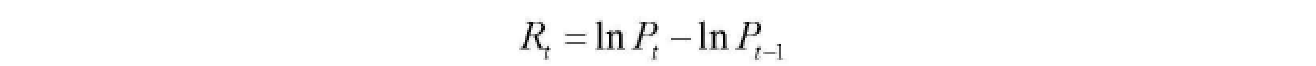

Define x as fluctuation sequence of the exchange rate at date t-5,t-4,t-3,t-2,t-1, and y is the fluctuation sequence of the exchange rate at date t.

In [2]:
x1=JPY.iloc[1:-4,1].values
x2=JPY.iloc[2:-3,1].values
x3=JPY.iloc[3:-2,1].values
x4=JPY.iloc[4:-1,1].values
x5=JPY.iloc[5:,1].values

x=np.stack((x1,x2,x3,x4,x5),axis=1)
x=x[:-1]
y=JPY.iloc[6:,1].values.reshape(-1,1)


print('x=',x.shape)
print('y=',y.shape)

x= (586, 5)
y= (586, 1)


Seperate the samples into training and test set.

In [3]:
t=7

y=y.reshape(-1,1)
x_train = x[:-t]
x_test = x[-t:]
y_train = y[:-t]
y_test = y[-t:]
print('x_train:',x_train)
print('x_test:',x_test)
print('y_train:',y_train)
print('y_test:',y_test)

x_train: [[-0.39  -0.59  -0.83  -0.39   0.51 ]
 [-0.59  -0.83  -0.39   0.51  -0.12 ]
 [-0.83  -0.39   0.51  -0.12   0.03 ]
 ...
 [-0.48  -0.765 -0.555  0.68  -0.075]
 [-0.765 -0.555  0.68  -0.075  1.515]
 [-0.555  0.68  -0.075  1.515 -0.415]]
x_test: [[ 0.68  -0.075  1.515 -0.415 -0.15 ]
 [-0.075  1.515 -0.415 -0.15  -0.385]
 [ 1.515 -0.415 -0.15  -0.385  0.705]
 [-0.415 -0.15  -0.385  0.705  0.17 ]
 [-0.15  -0.385  0.705  0.17   0.61 ]
 [-0.385  0.705  0.17   0.61  -0.46 ]
 [ 0.705  0.17   0.61  -0.46  -0.145]]
y_train: [[-0.12 ]
 [ 0.03 ]
 [ 0.39 ]
 [-1.1  ]
 [ 0.36 ]
 [ 0.3  ]
 [-0.67 ]
 [ 0.76 ]
 [ 1.04 ]
 [-0.45 ]
 [ 0.11 ]
 [ 0.28 ]
 [ 0.13 ]
 [ 2.3  ]
 [-0.14 ]
 [-1.05 ]
 [-2.08 ]
 [-1.09 ]
 [ 0.07 ]
 [-0.99 ]
 [-0.7  ]
 [-1.8  ]
 [-0.92 ]
 [ 0.78 ]
 [ 1.38 ]
 [-0.5  ]
 [ 0.   ]
 [-0.83 ]
 [-0.7  ]
 [ 0.36 ]
 [-0.83 ]
 [ 0.08 ]
 [ 0.81 ]
 [ 1.01 ]
 [-1.3  ]
 [ 1.3  ]
 [-0.52 ]
 [ 0.22 ]
 [ 0.09 ]
 [-0.32 ]
 [-0.88 ]
 [ 0.77 ]
 [-0.13 ]
 [ 0.62 ]
 [-0.01 ]
 [-0.68 ]
 [-0.46 ]
 [-

In [4]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()

x_train= min_max_scaler.fit_transform(x_train)
x_test= min_max_scaler.fit_transform(x_test)

y_train=min_max_scaler.fit_transform(y_train)
y_test= min_max_scaler.fit_transform(y_test)

In [5]:
print('After normalization:')
print('x_train:',x_train)
print('x_test:',x_test)
print('y_train:',y_train)
print('y_test:',y_test)

After normalization:
x_train: [[0.59730539 0.56736527 0.53143713 0.59730539 0.73203593]
 [0.56736527 0.53143713 0.59730539 0.73203593 0.63772455]
 [0.53143713 0.59730539 0.73203593 0.63772455 0.66017964]
 ...
 [0.58383234 0.54116766 0.57260479 0.75748503 0.64446108]
 [0.54116766 0.57260479 0.75748503 0.64446108 0.88248503]
 [0.57260479 0.75748503 0.64446108 0.88248503 0.59356287]]
x_test: [[0.56735751 0.1761658  1.         0.03862661 0.26609442]
 [0.1761658  1.         0.         0.26609442 0.06437768]
 [1.         0.         0.1373057  0.06437768 1.        ]
 [0.         0.1373057  0.01554404 1.         0.54077253]
 [0.1373057  0.01554404 0.58031088 0.54077253 0.91845494]
 [0.01554404 0.58031088 0.30310881 0.91845494 0.        ]
 [0.58031088 0.30310881 0.53108808 0.         0.27038627]]
y_train: [[0.63772455]
 [0.66017964]
 [0.71407186]
 [0.49101796]
 [0.70958084]
 [0.7005988 ]
 [0.55538922]
 [0.76946108]
 [0.81137725]
 [0.58832335]
 [0.67215569]
 [0.69760479]
 [0.6751497 ]
 [1.      

### Start to realize the BP neural network.

Define the nonlinear transformation and their deravatives.

In [6]:
import numpy as np

def tanh(x):
    return np.tanh(x)
def tanh_deriv(x):
    return 1.0 - np.tanh(x)*np.tanh(x)
def logistic(x):
    return 1/(1 + np.exp(-x))
def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

Construct the neutral network with BP algorithm.

In [7]:
class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        #Param layers is list containing the number of units in each layer and it should be at least two values.
        #Param activation is the activation function to be used.
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
            
        self.weights = []
       
        #The cycle starts from 1, which is equivalent to the initialization of weights based on the second level.
        for i in range(1, len(layers) - 1): 
            #The  assignments of the current neural nodes
            np.random.seed(8)
            self.weights.append((2*np.random.random((layers[i - 1] + 1, layers[i] + 1))-1)*0.25)
            
            np.random.seed(11)
            self.weights.append((2*np.random.random((layers[i] + 1, layers[i + 1]))-1)*0.25)
    
    #Define the training process with BP algorithm
    def fit(self, X, y, learning_rate=0.2, epochs=10000):
        X = np.atleast_2d(X)
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X
        X = temp
        y = np.array(y)
 
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
 
            for l in range(len(self.weights)):
                a.append(self.activation(np.dot(a[l], self.weights[l])))
            error = y[i] - a[-1]
            deltas = [error * self.activation_deriv(a[-1])]
 
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_deriv(a[l]))
            deltas.reverse()
 
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)        
            
    #Define the forecast function
    def predict(self, x):
        x = np.array(x)
        temp = np.ones(x.shape[0]+1)
        temp[0:-1] = x
        a = temp
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a     

Let the number of neuron in the input layer P equal the number of structure variable, which is 5. And set the number of neuron in the output layer O as 1. As for the number of neurons in the hidden layer, we use the emprical formula as below，resulting in 5.

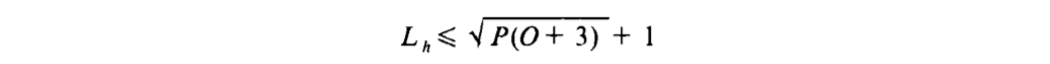

In [8]:
P=5
O=t
n=4
L=int(sqrt(P*(O+3))+1)-n
learning_rate=0.0001
L

4

In [9]:
nn = NeuralNetwork([P,L,O], 'tanh')
X = x_train
y = y_train
nn.fit(X,y,learning_rate,10000)

In [10]:
y_predict=[]
y_predict.append(nn.predict(x_test[0]))
y_predict=np.array(y_predict).T
y_predict

array([[0.31948021],
       [0.45967042],
       [0.40295619],
       [0.40949805],
       [0.3463283 ],
       [0.39813533],
       [0.43627277]])

In [11]:
prediction=np.zeros(shape=(t+1,4))
ANN=min_max_scaler.inverse_transform(y_predict)
prediction[1:,2]=np.hstack((ANN))
prediction[:,0]=JPY.iloc[-(t+1):,0].values
prediction[:,1]=np.log(JPY.iloc[-(t+1):,0].values)
prediction[0,1]
prediction[1,3]=prediction[0,1]+prediction[1,2]
prediction[[1]]

array([[ 1.05900000e+02,  4.66249525e+00, -8.78055543e-02,
         4.57831861e+00]])

In [12]:
for i in range (2,t+1):
    prediction[i,3]=prediction[i,2]+ prediction[i-1,3]
prediction[1:,3]=np.e**(prediction[1:,3])

In [13]:
np.savetxt('prediction_ANN.csv',prediction,delimiter=',',
           header='et,lnet,ANN,et_ANN',fmt='%6f')

Cauculate the accurancy by MAE, MSE, RMSE,MAPE and A.

In [14]:
prediction=pd.read_csv('prediction_ANN.csv',sep=',')
prediction.head(7)

,# et,lnet,ANN,et_ANN
0,106.285,4.666124,0.000000,0.000000
1,105.900,4.662495,-0.087806,97.350572
2,106.605,4.669130,0.075516,104.986803
3,106.775,4.670724,0.009444,105.982991
4,107.385,4.676421,0.017065,107.807135
5,106.925,4.672128,-0.056528,101.882105
6,106.780,4.670771,0.003828,102.272821


In [15]:
y_real=prediction.iloc[1:,0].values
y_pre_ANN=prediction.iloc[1:,3].values
y_real

array([105.9  , 106.605, 106.775, 107.385, 106.925, 106.78 , 107.195])

In [16]:
#Mean squrad error
MSE_ANN=np.sum(np.abs(y_real-y_pre_ANN))/t
MSE_ANN

3.009450000000001

In [17]:
#Mean abosolute error
MAE_ANN=np.sum((y_real-y_pre_ANN)*(y_real-y_pre_ANN))/t
MAE_ANN

17.468606823087722

In [18]:
#RMSE
RMSE_ANN=np.sqrt(MSE_ANN)
RMSE_ANN

1.7347766426834323

In [19]:
#MAPE
MAPE_ANN=1/t*np.sum(np.abs((y_real-y_pre_ANN)/y_real))
MAPE_ANN

0.028269271956839842

In [20]:
#U
U_ANN=1-MAPE_ANN
U_ANN

0.9717307280431602

In [21]:
index=np.zeros(shape=(1,5))
index[[0]]=[MSE_ANN,MAE_ANN,RMSE_ANN,MAPE_ANN,U_ANN]

np.savetxt('index_ANN.csv',index,delimiter=',',header='MSE,MAE,RMSE,MAPE,U',fmt='%6f')

Use the grid search method to adjust the parameters.

In [22]:
## This Grid search take about 3 minutes.##
best_U_ANN=0
for learning_rate in [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]:
    for n in [0,1,2,3,4,5,6,7]:
        L=int(sqrt(P*(O+3))+1)-n
        nn = NeuralNetwork([P,L,O], 'tanh')
        X = x_train
        y = y_train
        nn.fit(X,y,learning_rate,10000)
        
        y_predict=[]
        y_predict.append(nn.predict(x_test[0]))
        y_predict=np.array(y_predict).T
       
        prediction=np.zeros(shape=(t+1,4))
        ANN=min_max_scaler.inverse_transform(y_predict)
        prediction[1:,2]=np.hstack((ANN))
        prediction[:,0]=JPY.iloc[-(t+1):,0].values
        prediction[:,1]=np.log(JPY.iloc[-(t+1):,0].values)
        prediction[1,3]=prediction[0,1]+prediction[1,2]
        
        for i in range (2,t+1):
            prediction[i,3]=prediction[i,2]+ prediction[i-1,3]
        prediction[1:,3]=np.e**(prediction[1:,3])        
        
        y_real=prediction[1:,0]
        y_pre_ANN=prediction[1:,3]
        
        MAPE_ANN=1/t*np.sum(np.abs((y_real-y_pre_ANN)/y_real))
        U_ANN=1-MAPE_ANN
        
        if U_ANN > best_U_ANN:
            best_U_ANN=U_ANN
            best_ANN_parameters = {'n':n,'learning_rate':learning_rate}
            
print("Best ANN score:{:.7f}".format(best_U_ANN))
print("Best ANN parameters:{}".format(best_ANN_parameters))

Best ANN score:0.9717307
Best ANN parameters:{'n': 4, 'learning_rate': 0.0001}
